# INVESTIGATE A DATASET

### TMDB Movie Data (1960 - 2015)

#### About The Data
#### Source: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata


This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

#### STEP 1 - ASK QUESTIONS

Investigating our dataset requires us to ask a few questions such as 
1. Which genres are most popular from year to year? 
2. What year has the highest profit till date?
3. What kinds of properties are associated with movies that have high profits?
4. What is the relationship between budget of a movie versus the profit it generates?
5. What is the relationship between the budget of a movie versus the ratings it gets?

#### STEP 2 - WRANGLE THE DATA
Wrangling our data invloves three steps
1. Gather
2. Assess and 
3. Clean


In [1]:
# Let's import libraries and packages to be used for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

mov = pd.read_csv('tmdb-movies.csv')

In [2]:
# Previewing the data
mov.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Getting information about the data
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# Figuring the rows and columns of the data
mov.shape

(10866, 21)

In [5]:
# Getting the number of rows with missing value
mov.isnull().sum()

# Getting the percentage of the missing values
mov.isnull().sum()/mov.shape[0] * 100

# We can see that for a few columns, majority of the observation have missing values
# Hence, we will drop these columns

id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64

In [6]:
# We are going to drop columns that are less relevant to our anlysis
# 1.Homepage, 2.Tagline, 3.Keywords, 4.Production Companies
mov.drop(['homepage', 'tagline', 'keywords', 'production_companies'], axis=1, inplace=True)
mov.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
# After dropping columns, we are going to get the number of rows with missing values
mov.isnull().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
overview           4
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [8]:
# we are going to drop rows with missing values
mov = mov.dropna()

In [9]:
# Previewing the data after removing rows with missing values
mov.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
# As part of our cleaning process, from the data info()
# we can see that our release_date is in str format; we have to convert it to Date
mov['release_date'] = pd.to_datetime(mov['release_date'])

In [11]:
# We have to get a quick snapshot of the data statitics
mov.describe(exclude=None)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10725.000000,10725.000000,1.072500e+04,1.072500e+04,10725.000000,10725.000000,10725.000000,10725.000000,1.072500e+04,1.072500e+04
mean,65182.327925,0.652852,1.481473e+07,4.034253e+07,102.502471,219.933054,5.964317,2001.255012,1.777804e+07,5.203541e+07
std,91470.421976,1.005025,3.107129e+07,1.176814e+08,30.458857,578.955633,0.930166,12.822147,3.447315e+07,1.454606e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10546.000000,0.210766,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20309.000000,0.387304,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,73937.000000,0.721548,1.600000e+07,2.500526e+07,112.000000,148.000000,6.600000,2011.000000,2.113258e+07,3.476553e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


We can now say we have a clean data
* We have been able to gather our data
* We have assessed the data and observed a few columns we needed to drop and we did
* We also removed rows with missing values 
* We Observed that our date wasn't in the right format and we have successfully formated it to DateTime

#### STEP 3 - Exploratory Data Analysis
At least three variables will be investigated using both single-variable (1d) and multiple-variable (2d) explorations.

In [12]:
# Getting the Year and Genres that were most popular
# First we have to examine how many unique genres we have
mov['genres'].nunique()

2020

In [13]:
# getting the first and last and year of the dataset
print(mov['release_year'].min(),
      mov['release_year'].max() 
     )

1960 2015


### Question 1 - Which genres are most popular from year to year?

In [14]:
# Getting the genre with the most popularity
mov_g = mov.groupby(['genres'])['popularity'].sum()
mov_g

# Action movies with popularity rating of 37.+ doesnt satisfy the question since we have over 10,000 observations

genres
Action                                      37.269991
Action|Adventure                            10.360652
Action|Adventure|Animation                   1.818651
Action|Adventure|Animation|Comedy|Drama      0.370019
Action|Adventure|Animation|Comedy|Family     0.063246
                                              ...    
Western|Drama|Crime|Romance                  0.393664
Western|History                              0.128234
Western|History|War                          0.948560
Western|Horror|Thriller                      0.354484
Western|Thriller                             0.387592
Name: popularity, Length: 2020, dtype: float64

In [15]:
# we have to group our movies by these 2039 different genres and count which is the mode for each year
mov_g = mov.groupby(['genres', 'release_year'])['popularity'].sum()
mov_g
# we can se that this doesn't work either as a large number of our data is truncated

genres                       release_year
Action                       1976            0.126723
                             1982            0.174119
                             1985            0.092747
                             1986            0.523347
                             1988            1.392581
                                               ...   
Western|Drama|Crime|Romance  2013            0.393664
Western|History              1980            0.128234
Western|History|War          2004            0.948560
Western|Horror|Thriller      1999            0.354484
Western|Thriller             2013            0.387592
Name: popularity, Length: 6044, dtype: float64

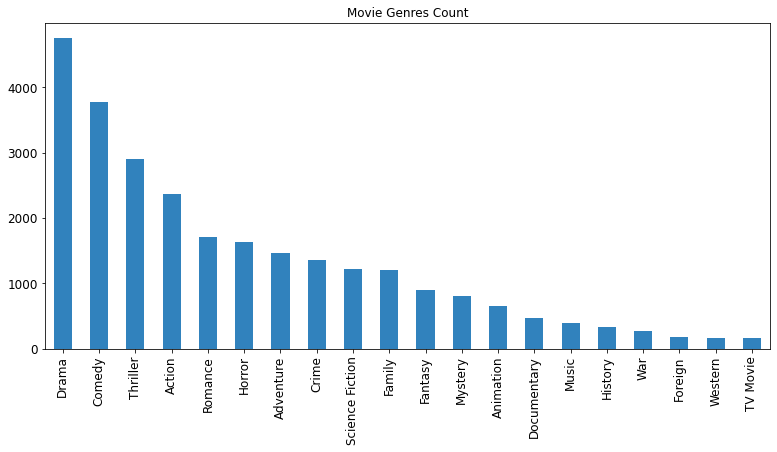

In [36]:
# We can see that a lot of the movies fall into more than one genre

# We will make a function that will combine all string of the genre column and 
# split the string by '|' and return the count of each genre year till date.
def num_genre(gen):
    #concatenate all the rows of the genrs.
    data_plot = mov[gen].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_genre_movies = num_genre('genres')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'bar',figsize = (13,6),fontsize=12,colormap='tab20c')
plt.title('Movie Genres Count');

#### Insight
We can see from the above bar chart that majority of the movies produced from 1960 to 2015 has been categorised under the genre 'Drama'

The Five most prominent genres are
1. Drama
2. Comedy
3. Thriller
4. Action
5. Romance

### Question 2 - What year has the highest profit till date?

In [17]:
# We will create a column to calculate the profit / loss of each movie
mov['profit'] = mov['revenue'] - mov['budget']

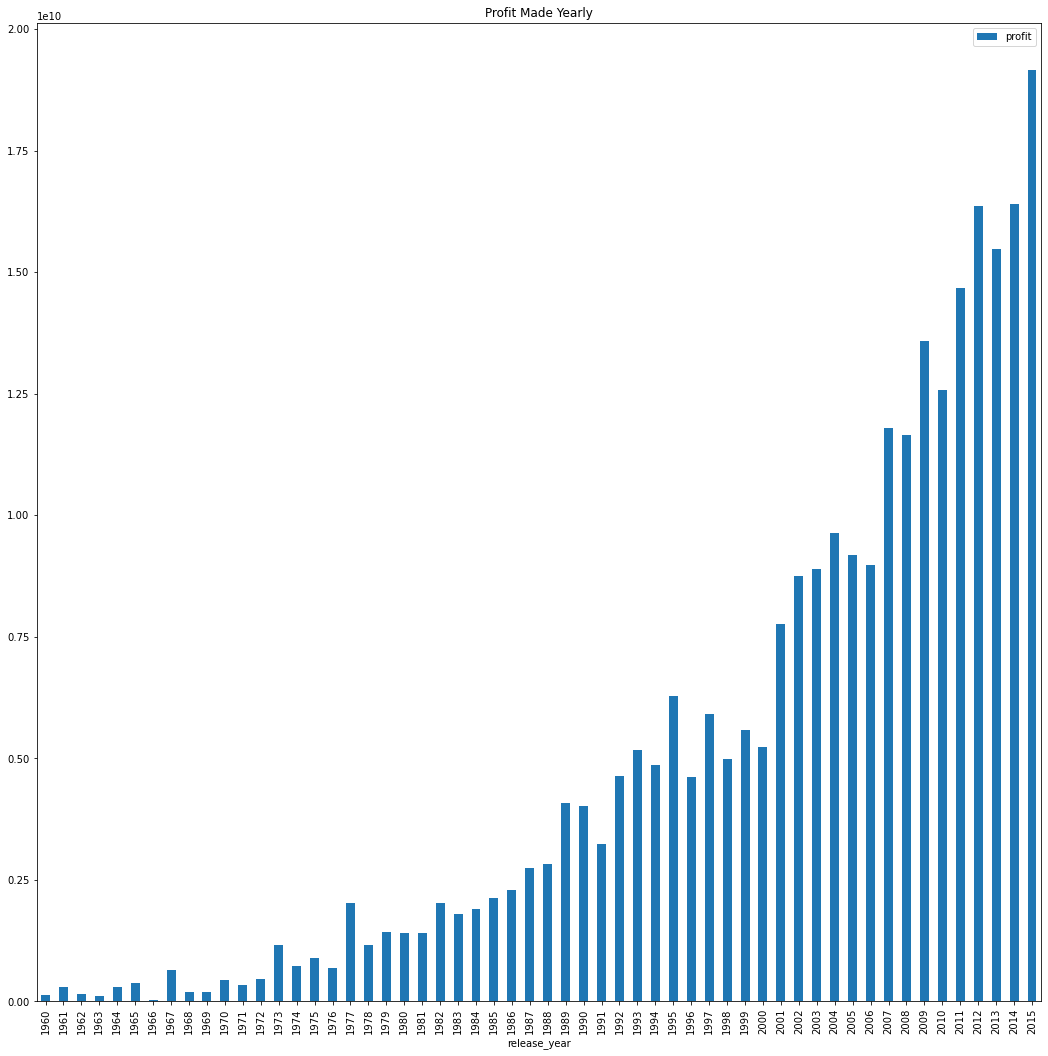

In [37]:
# We will get the profit / loss of movies for each year by using the groupby() and plot
profit_by_year = pd.DataFrame(mov.groupby(['release_year'])['profit'].sum())
profit_by_year.plot(kind='bar', figsize=(18,18))
plt.title('Profit Made Yearly');

#### Insight
We can see from our above chart that 2015 has the highest profit made

### Question 3 - What kinds of properties are associated with movies that have high revenues
Here, we are going to find the correlation between revenue and other variables of the dataset

In [ ]:
# Plotting histogram to show the value counts of revenue vs other variables in the dataset
mov.hist(figsize= (15,15));
mov['profit'].hist();
mov['profit'].plot(kind='hist');

Scatter Matrix


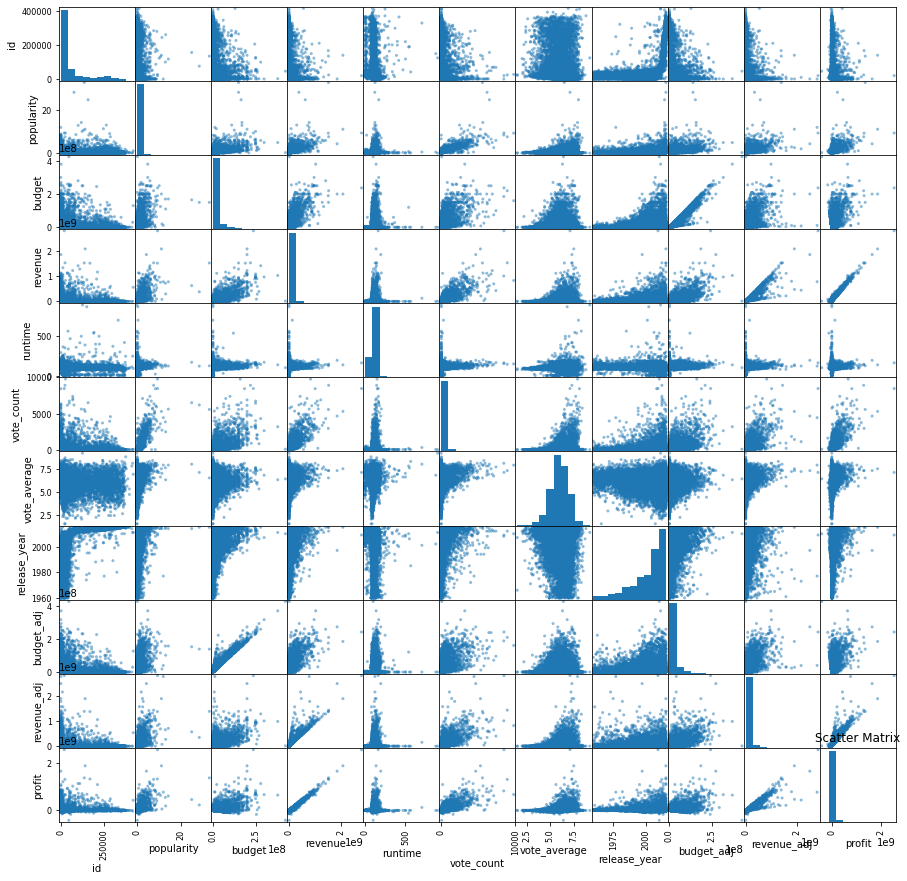

In [41]:
# Using pandas to plot a scatter matrix 
print('Scatter Matrix')
pd.plotting.scatter_matrix(mov, figsize = (15,15))

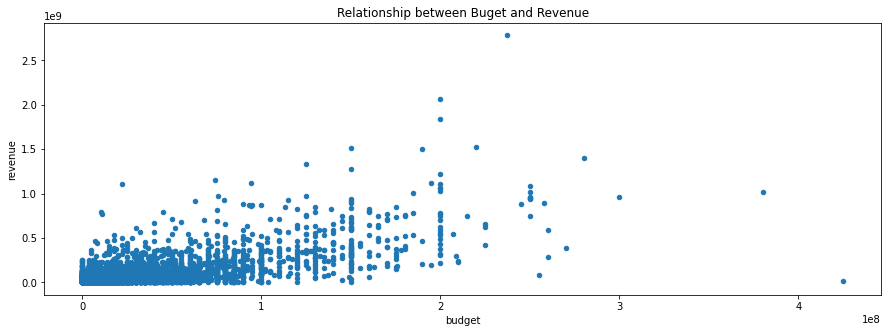

In [62]:
# Finding the correlation between revenue and budget
mov.plot(x='budget', y= 'revenue', kind = 'scatter', figsize=(15,5))
plt.title('Relationship between Buget and Revenue');

#### Insight
We can observe that a positive relationship is depicted in the above scatter plot but not too strong a reltionship

What this mean is that while we can associate the revenue generated by a movie with its budget, the budget doesnt not completely explain the incrase in revenue

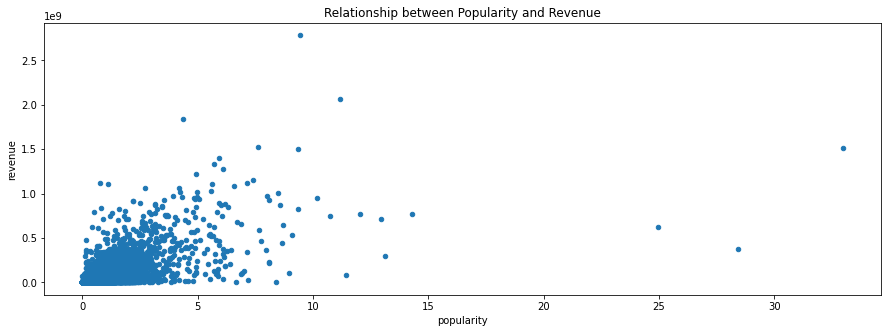

In [43]:
# Finding the correlation between revenue and popularity
mov.plot(x='popularity', y= 'revenue', kind = 'scatter', figsize=(15,5))
plt.title('Relationship between Popularity and Revenue');

#### Insight
There are certain outliers in the above chart.

However, this explians a positive relationship between the revenue a movie generates versus the popularity is gains

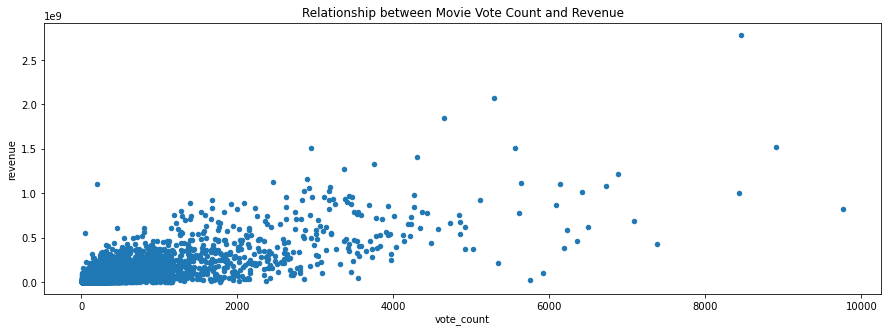

In [45]:
# Finding the correlation between revenue and budget
mov.plot(x='vote_count', y= 'revenue', kind = 'scatter', figsize=(15,5))
plt.title('Relationship between Movie Vote Count and Revenue');

#### Insight
We can observe a positive relationship between Revenue and vote count

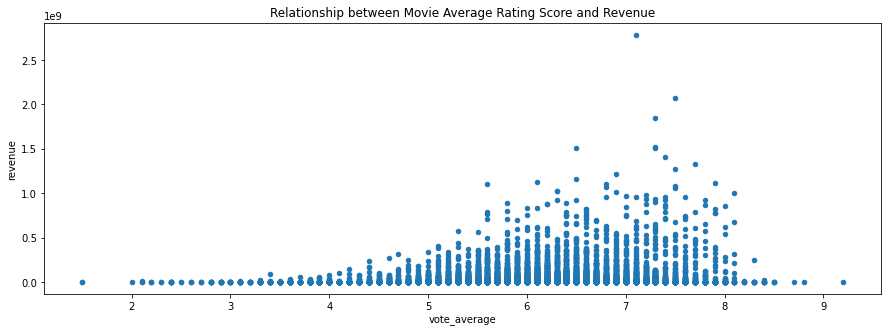

In [46]:
# Finding the correlation between revenue and budget
mov.plot(x='vote_average', y= 'revenue', kind = 'scatter', figsize=(15,5));
plt.title('Relationship between Movie Average Rating Score and Revenue');

#### Insight
We can observe no positive nor negative relationship between revenue and vote average

From the previus graph 'Relationship between Movie Vote Count and Revenue', we can say whil revenue is positively related with vote count, the vote count doesnt necessarily mean it was voted for favorably

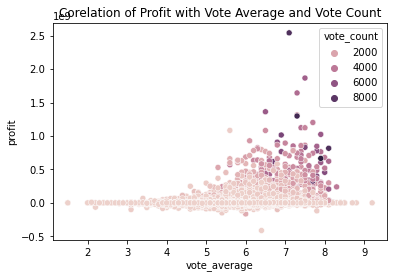

In [66]:
sns.scatterplot( data=mov, x='vote_average', y='profit', hue='vote_count').set(title='Corelation of Profit with Vote Average and Vote Count');

#### Insight
We can observe from our plot above that profit is positively related to vote average and vote count likewise

### Question 4 - What is the relationship between budget of a movie versus the profit it generates?

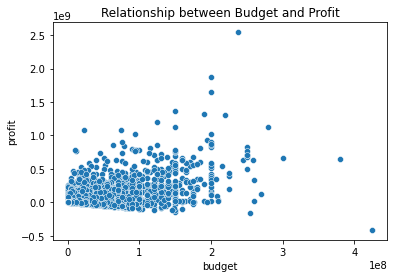

In [60]:
sns.scatterplot(x='budget', y='profit', data=mov).set(title='Relationship between Budget and Profit');
# The plot clearly informs us that the relationship is positive 
# However the profit of a movie is reasonably a funtion of how much was invested in its production.

#### Insight
We can observe a positive relations between Budet and profit

#### Question 5 - What is the relationship between the budget of a movie versus the ratings it gets?

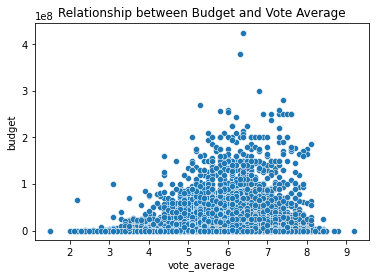

In [56]:
sns.scatterplot(x='vote_average', y='budget', data=mov).set(title='Relationship between Budget and Vote Average');
# we can see that there is no positive relationship between the budget of a movie versus the average_vote it gets

#### Insight
We can observe no positive relationship between Budget and Vote Average

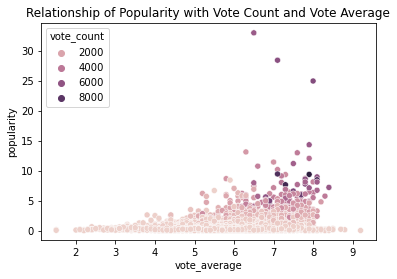

In [61]:
# Finding the relationship between the popularity a movie gets versus the vote_count and vote_average
sns.scatterplot(x='vote_average', y='popularity', hue='vote_count', data=mov).set(title='Relationship of Popularity with Vote Count and Vote Average');
# From the plot below, we see that there is positive relationship between the popularity a movie gets and the vote it recieves

#### Insight
Here we see a strong correlation between the popularity a movie gets and the Vote count and Vote average vote it gets

### Limitation:  The data is limited by a variety of factors
While the isight gotten from the analysis above can be verified, it is important to realise that the data timeline ended over five years ago.

Hence, with  the recent technological advancement in the worlsd and the movie industry, we can't categorically say that the most produced genre of movie is DRAMA

### Conclusion


1. There is no positive relationship between the budget of a movie versus the average_vote it gets
2. There is positive relationship between the popularity a movie gets and the vote it recieves
3. The relationship between the budget of a movie versus the profit it generates is positive. However, the profit of a movie is reasonably a funtion of how much was invested in its production.
4. The highest profit in the film industry year to date was recorded in 2015 from the dataset

In [29]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'TMDB_Movie_Dataset.ipynb'])

1

In [30]:
pip install -U notebook-as-pdf

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pyppeteer-install